In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('winequality-red.csv')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Analisis de Histogramas

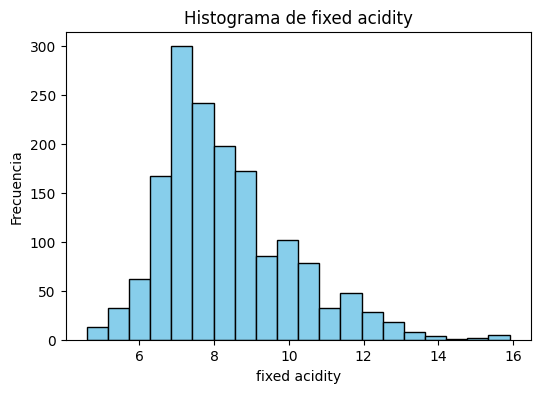

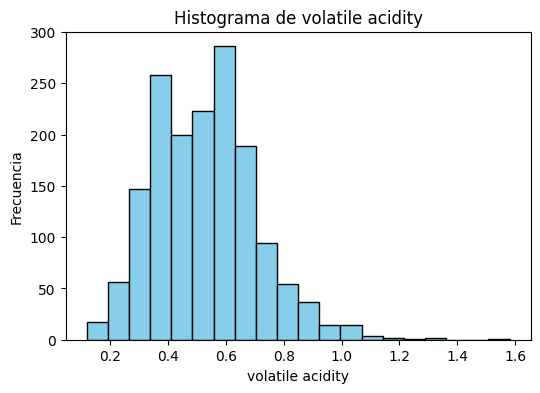

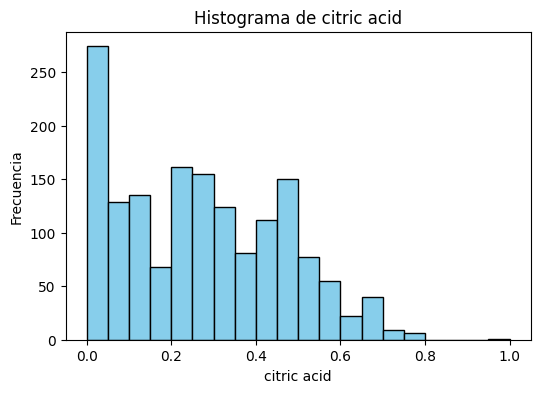

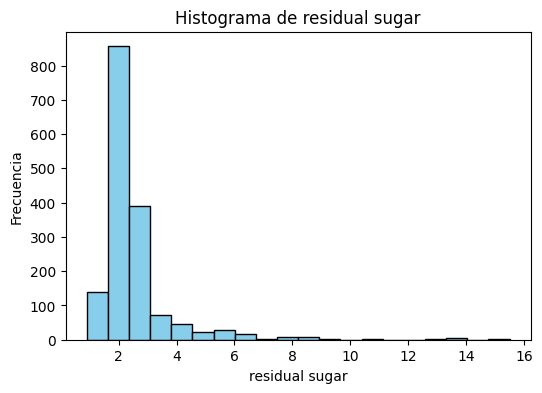

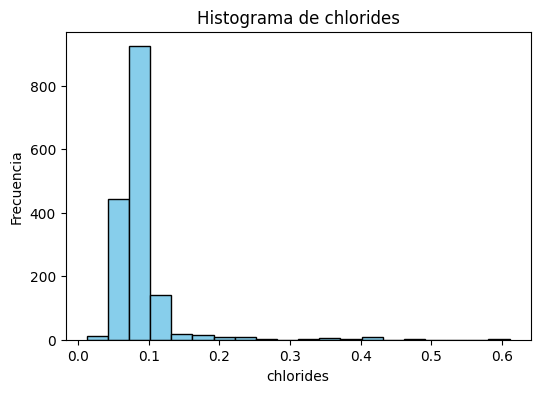

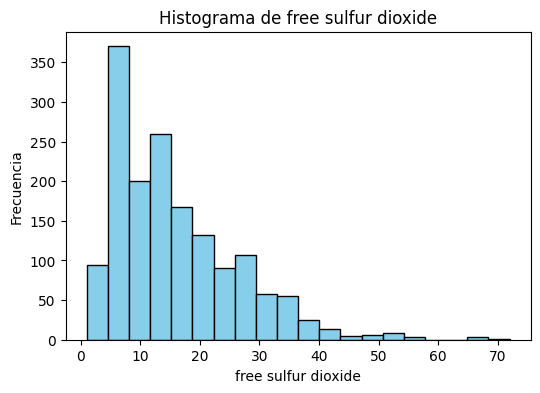

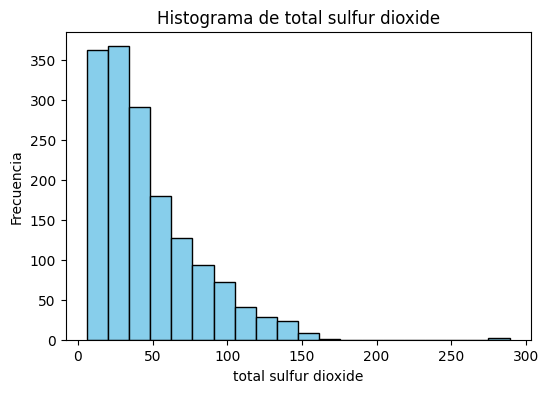

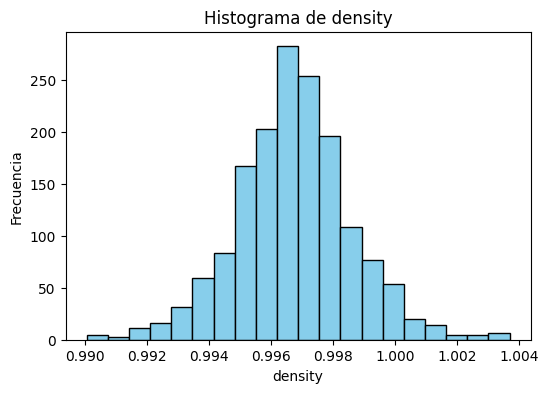

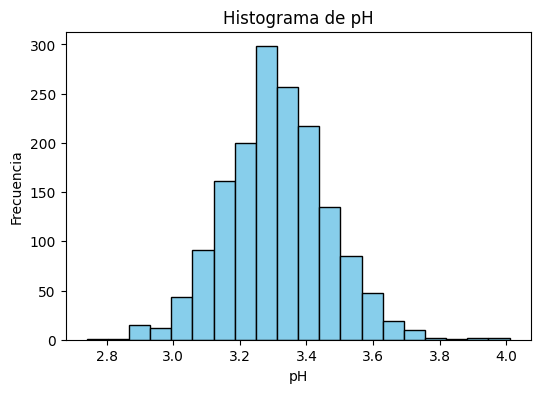

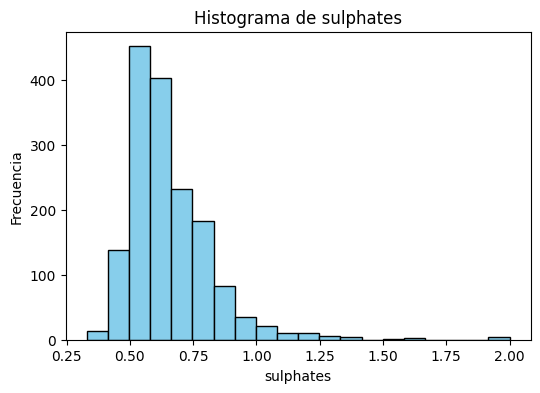

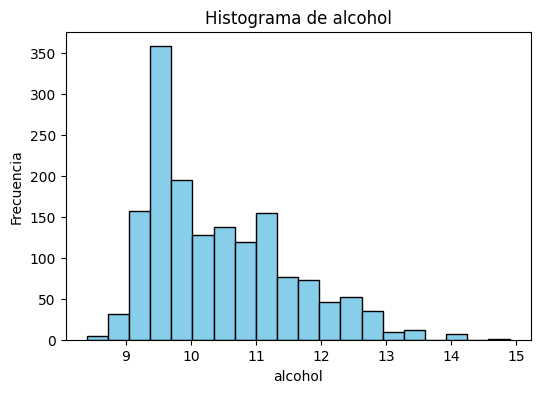

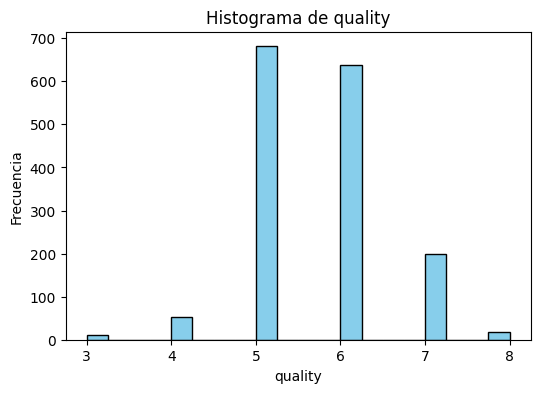

In [3]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

## Analisis de Boxplots

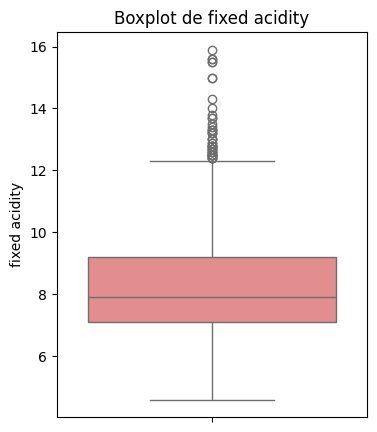

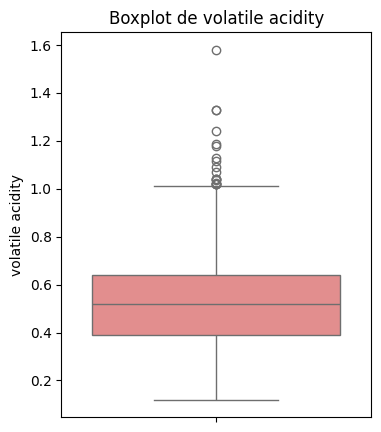

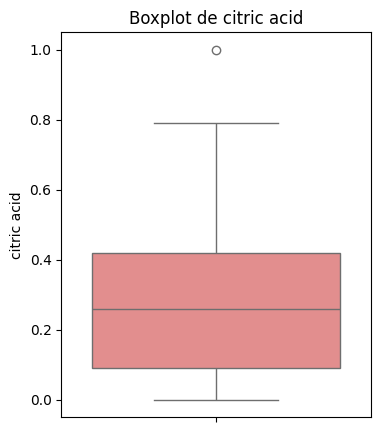

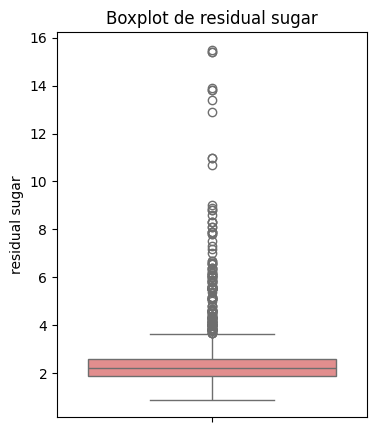

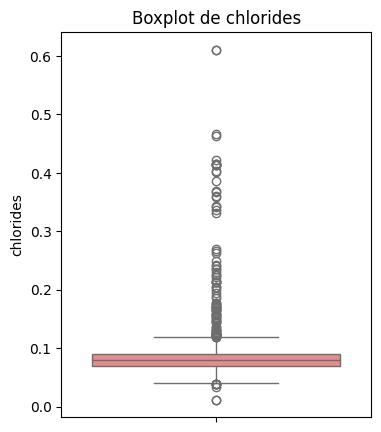

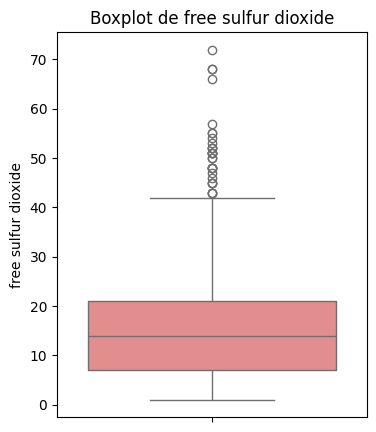

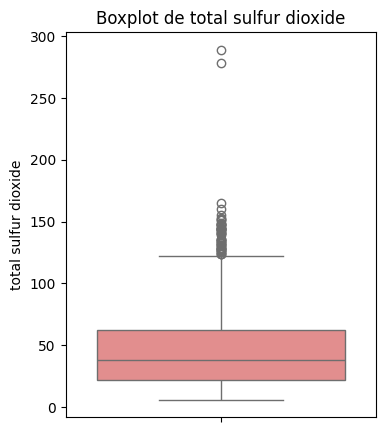

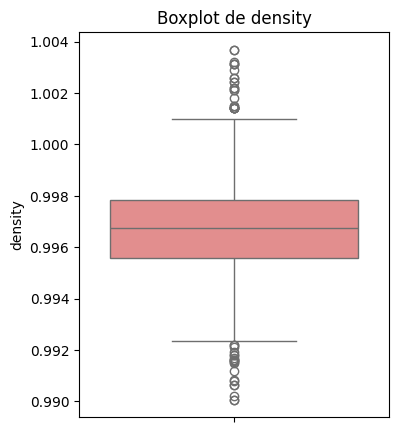

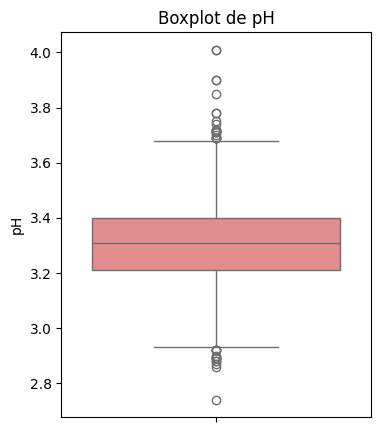

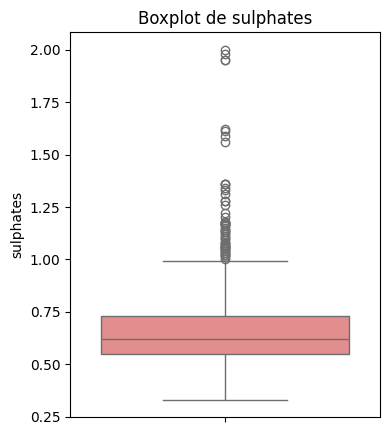

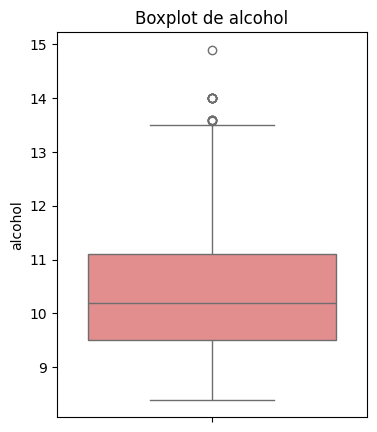

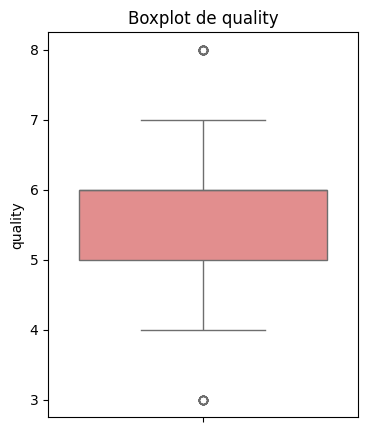

In [4]:
for col in df.columns:  # excluir 'quality'
    plt.figure(figsize=(4, 5))
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(f"Boxplot de {col}")
    plt.show()

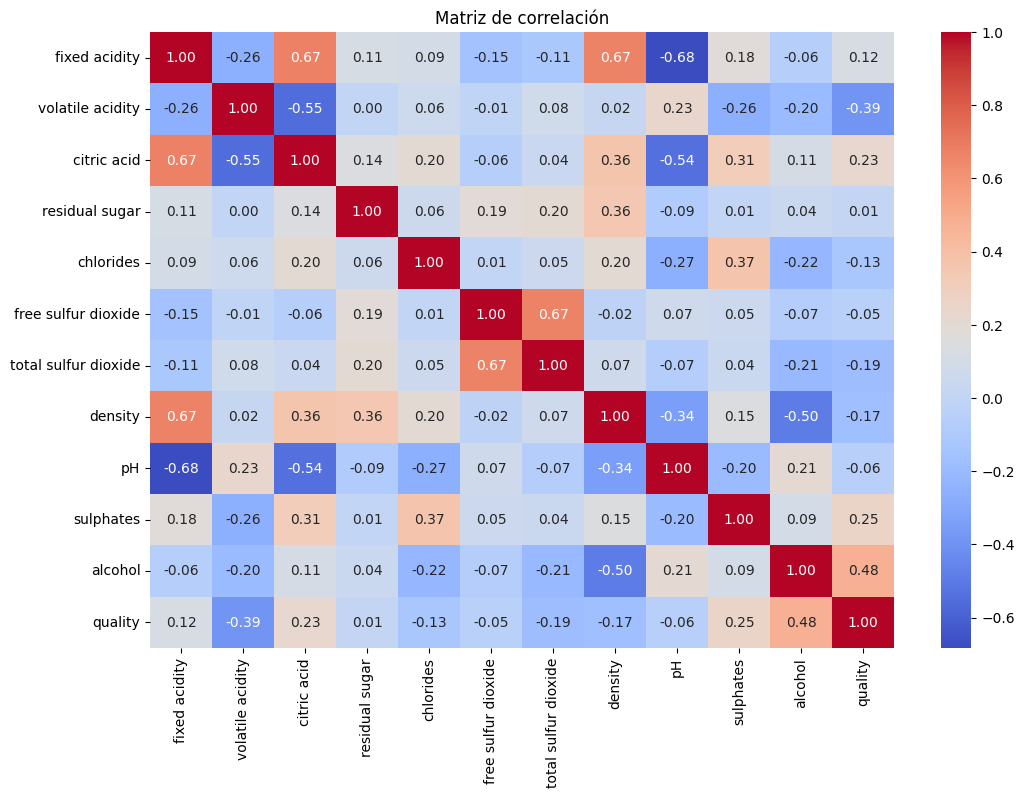

In [5]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

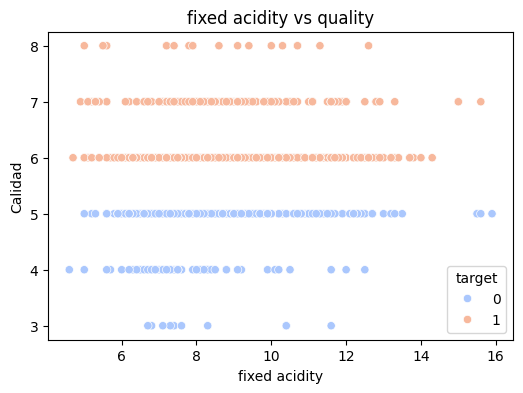

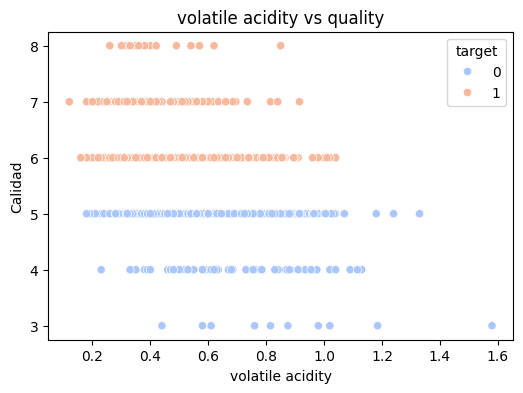

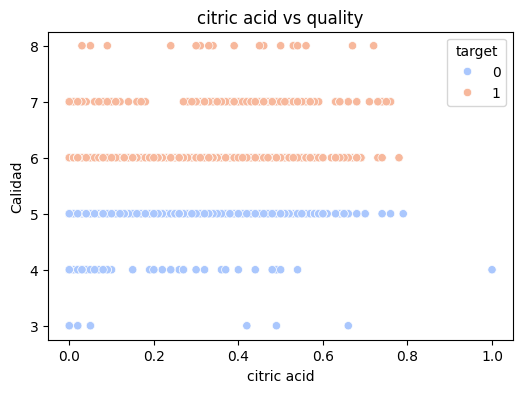

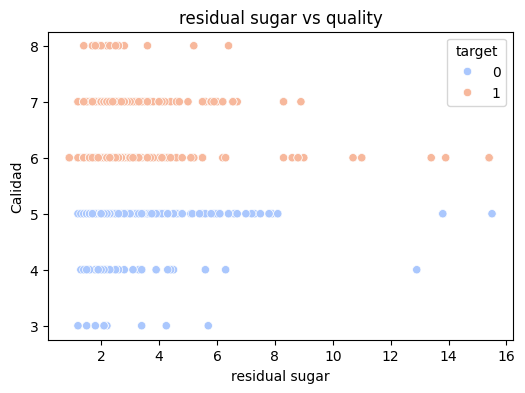

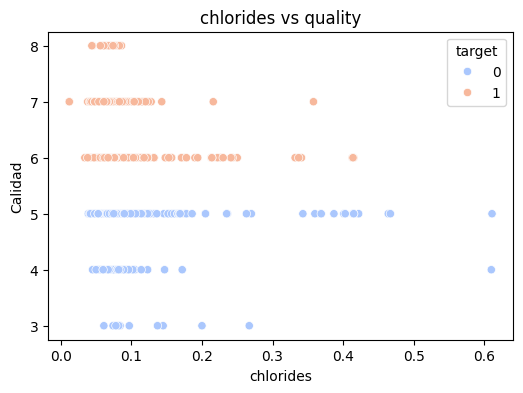

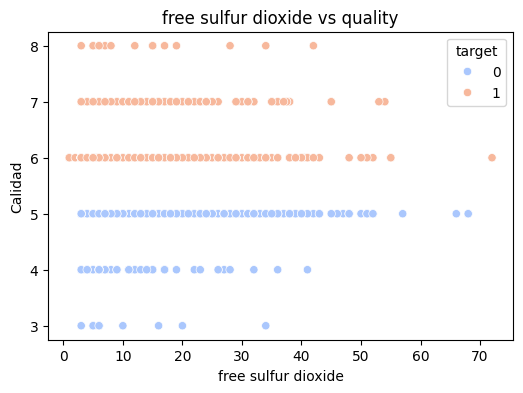

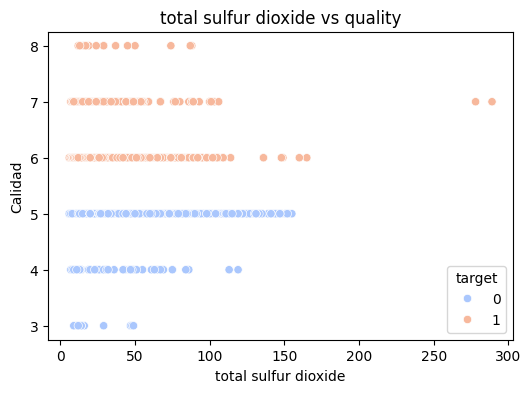

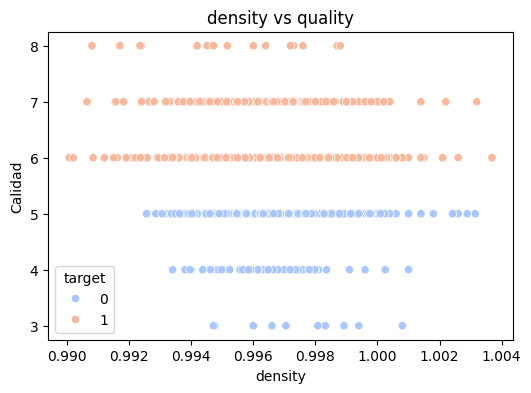

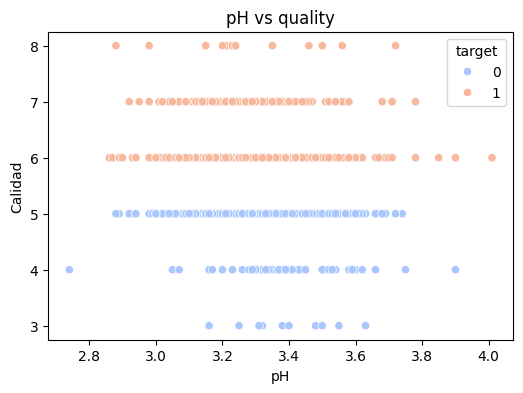

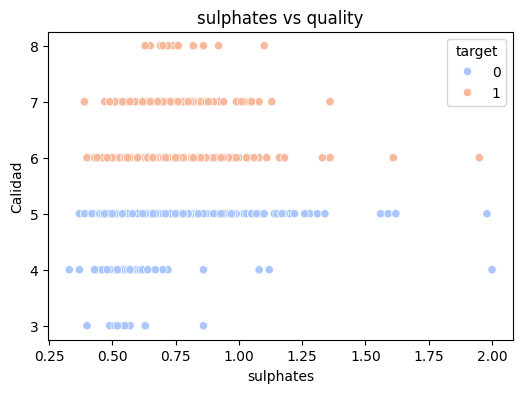

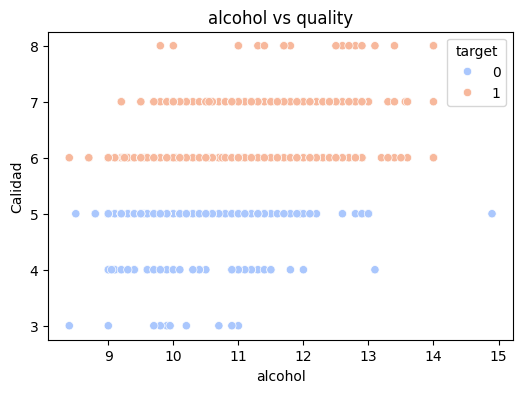

In [6]:
df["target"] = (df["quality"] >= 6).astype(int)

for col in df.columns[:-2]: 
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df["quality"], hue=df["target"], palette="coolwarm")
    plt.title(f"{col} vs quality")
    plt.xlabel(col)
    plt.ylabel("Calidad")
    plt.show()

## Pruebas de relevancia estadística: Chi-Cuadrado

In [7]:
from scipy.stats import chi2_contingency

features = [col for col in df.columns if col not in ['quality', 'target']]

results = []

for col in features:
    # Discretizar en 4 bins (cuartiles) para convertir en variable categórica
    df[col + '_bin'] = pd.qcut(df[col], q=4, duplicates='drop')
    
    # Tabla de contingencia
    table = pd.crosstab(df[col + '_bin'], df['target'])
    
    # Chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(table)
    
    results.append({
        'Variable': col,
        'Chi2': chi2,
        'p-value': p
    })

chi_results = pd.DataFrame(results).sort_values(by="p-value")

print(chi_results)

print("\nVariables significativas (p < 0.05):")
print(chi_results[chi_results['p-value'] < 0.05])

                Variable        Chi2       p-value
10               alcohol  315.707128  3.962959e-68
9              sulphates  182.290099  2.824182e-39
1       volatile acidity  156.840806  8.807737e-34
7                density   88.416508  4.793328e-19
6   total sulfur dioxide   86.768425  1.082725e-18
2            citric acid   67.143887  1.744467e-14
4              chlorides   48.943677  1.340973e-10
0          fixed acidity   25.095454  1.474694e-05
5    free sulfur dioxide    5.435893  1.425236e-01
3         residual sugar    1.835783  6.071792e-01
8                     pH    1.067559  7.849106e-01

Variables significativas (p < 0.05):
                Variable        Chi2       p-value
10               alcohol  315.707128  3.962959e-68
9              sulphates  182.290099  2.824182e-39
1       volatile acidity  156.840806  8.807737e-34
7                density   88.416508  4.793328e-19
6   total sulfur dioxide   86.768425  1.082725e-18
2            citric acid   67.143887  1.7444

## Tratamiento de Outliers

Topes de winsorización aplicados (1% y 99%):
alcohol: [9.0000, 13.4000]
sulphates: [0.4200, 1.2604]
volatile acidity: [0.1900, 1.0200]
density: [0.9918, 1.0015]
total sulfur dioxide: [8.0000, 145.0000]
citric acid: [0.0000, 0.7002]
chlorides: [0.0430, 0.3602]
fixed acidity: [5.2000, 13.3000]


/tmp/ipykernel_7600/2812423629.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X8[col] for col in candidates], labels=candidates, showmeans=True)


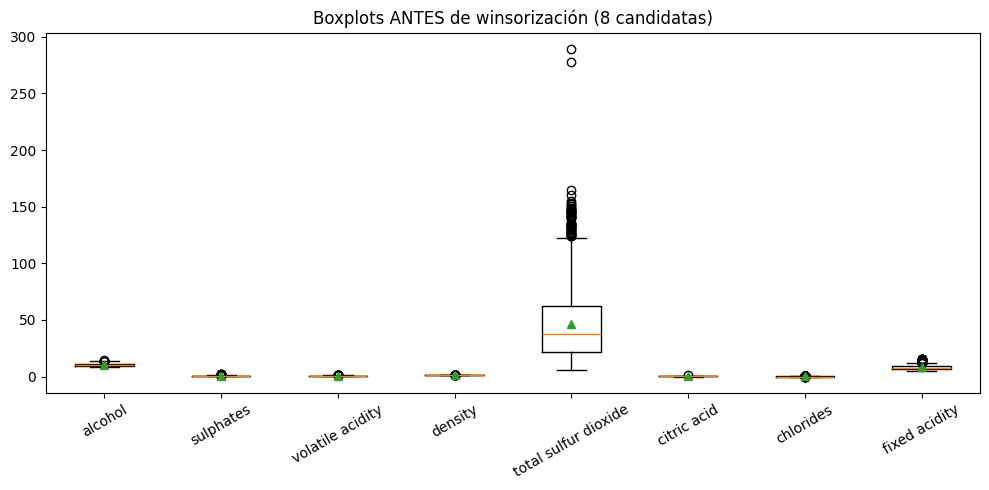

/tmp/ipykernel_7600/2812423629.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X8_winz[col] for col in candidates], labels=candidates, showmeans=True)


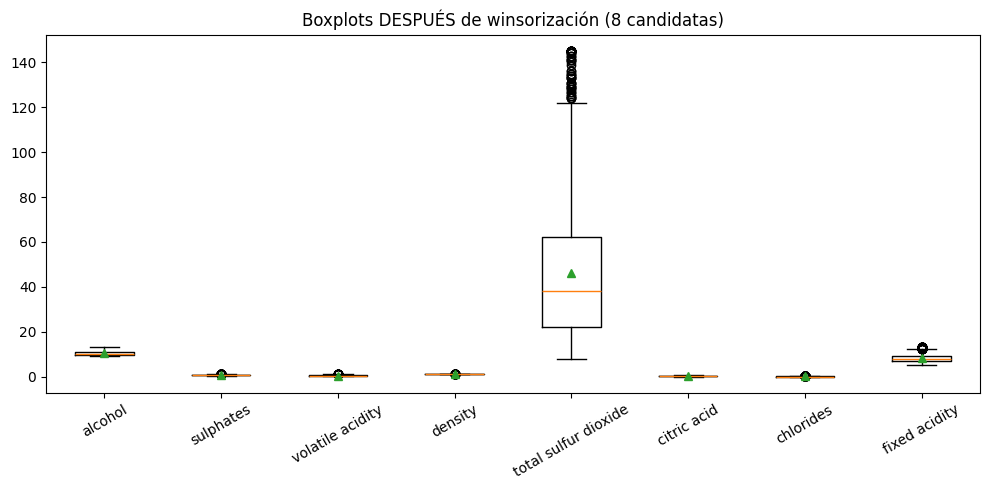

In [8]:
# 8 candidatas (p<0.05)
candidates = [
    "alcohol",
    "sulphates",
    "volatile acidity",
    "density",
    "total sulfur dioxide",
    "citric acid",
    "chlorides",
    "fixed acidity",
]

X8 = df[candidates].copy()

def winsorize_df(df_in, lower=0.01, upper=0.99):
    df_out = df_in.copy()
    caps = {}
    for col in df_in.columns:
        lo = df_in[col].quantile(lower)
        hi = df_in[col].quantile(upper)
        df_out[col] = np.clip(df_in[col], lo, hi)
        caps[col] = (float(lo), float(hi))
    return df_out, caps

# Tratamiento de outliers ANTES de correlación/normalización
X8_winz, caps = winsorize_df(X8, lower=0.01, upper=0.99)

print("Topes de winsorización aplicados (1% y 99%):")
for k,(lo,hi) in caps.items():
    print(f"{k}: [{lo:.4f}, {hi:.4f}]")

# Boxplots antes vs después
plt.figure(figsize=(10,5))
plt.boxplot([X8[col] for col in candidates], labels=candidates, showmeans=True)
plt.title("Boxplots ANTES de winsorización (8 candidatas)")
plt.xticks(rotation=30); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.boxplot([X8_winz[col] for col in candidates], labels=candidates, showmeans=True)
plt.title("Boxplots DESPUÉS de winsorización (8 candidatas)")
plt.xticks(rotation=30); plt.tight_layout(); plt.show()

## Matriz de Correlación

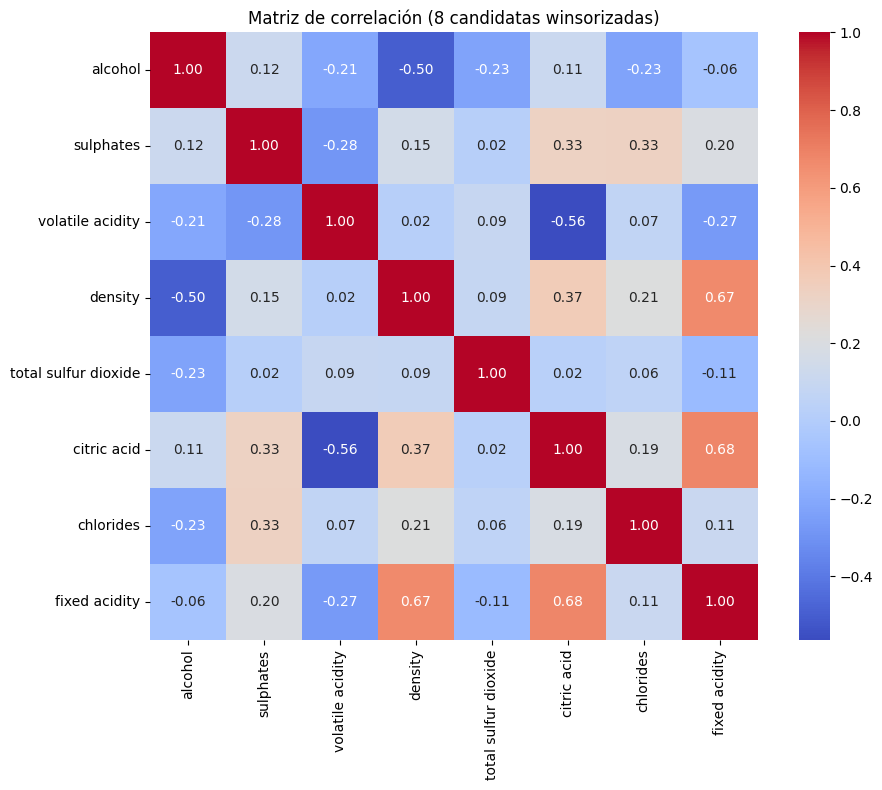

In [9]:
plt.figure(figsize=(10, 8))
corr = X8_winz.corr(method="pearson")  # <-- solo las 8 candidatas winsorizadas
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de correlación (8 candidatas winsorizadas)")
plt.tight_layout()
plt.show()

## Stratified Sampling

In [10]:
from sklearn.model_selection import train_test_split

final6 = ["alcohol","sulphates","volatile acidity",
          "citric acid","total sulfur dioxide","chlorides"]

# Asegúrate de tener df y df['target'] creado (quality>=6)
X = df[final6].copy()
y = df["target"].astype(int)

# 60% train / 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, stratify=y, random_state=42
)
# 20% val / 20% test (mitad y mitad del 40% temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

def props(name, yy):
    u, c = np.unique(yy, return_counts=True)
    print(f"{name}: n={len(yy)}  proporciones={{ {u[0]}:{c[0]/len(yy):.2f}, {u[1]}:{c[1]/len(yy):.2f} }}")
props("Train", y_train); props("Val", y_val); props("Test", y_test)


Train: n=959  proporciones={ 0:0.47, 1:0.53 }
Val: n=320  proporciones={ 0:0.47, 1:0.53 }
Test: n=320  proporciones={ 0:0.47, 1:0.53 }


## Feature Engineering: Normalización

In [11]:
from sklearn.preprocessing import StandardScaler

# 1) Ajustar scaler SOLO con TRAIN
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train[final6])

# 2) Transformar VAL y TEST con el mismo scaler
X_val_sc  = scaler.transform(X_val[final6])
X_test_sc = scaler.transform(X_test[final6])

# 3) Volver a DataFrame para inspección
X_train_sc = pd.DataFrame(X_train_sc, columns=final6, index=X_train.index)
X_val_sc   = pd.DataFrame(X_val_sc,   columns=final6, index=X_val.index)
X_test_sc  = pd.DataFrame(X_test_sc,  columns=final6, index=X_test.index)

# 4) Revisión de la normalización: medias≈0 y std≈1 en TRAIN
print(X_train_sc.describe().loc[["mean","std"]].round(3))


      alcohol  sulphates  volatile acidity  citric acid  total sulfur dioxide  \
mean   -0.000      0.000            -0.000        0.000                 0.000   
std     1.001      1.001             1.001        1.001                 1.001   

      chlorides  
mean     -0.000  
std       1.001  


## Adaptacion a PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# 1) Convertir a tensores
X_train_t = torch.tensor(X_train_sc.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)

X_val_t = torch.tensor(X_val_sc.values, dtype=torch.float32)
y_val_t = torch.tensor(y_val.values, dtype=torch.float32).view(-1,1)

X_test_t = torch.tensor(X_test_sc.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1)



## Definicion de modelo de regresion logistica

In [14]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

## Entrenamiento

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


def train_model(lr, batch_size, epochs):
    train_ds = TensorDataset(X_train_t, y_train_t)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    model = LogisticRegression(input_dim=X_train_t.shape[1])
    criterion = nn.BCELoss() 
    optimizer = optim.SGD(model.parameters(), lr=lr)

    history = {"train_loss": [], "val_loss": []}

    for epoch in range(epochs):
        batch_losses = []
        for xb, yb in train_loader:
            outputs = model(xb) # Prediccion
            loss = criterion(outputs, yb) # Calculo de la loss function, BCELoss es la log-likelihood negativa que vimos en clase
            loss.backward() # Computar gradientes de la loss function
            optimizer.step() # Actualizar pesos
            batch_losses.append(loss.item()) # Guardar loss del batch
            optimizer.zero_grad() # Reiniciar gradientes para el siguiente batch

        # Promedio de train loss en la época
        history["train_loss"].append(sum(batch_losses)/len(batch_losses))

        if (epoch+1) % 10 == 0:
            print(f'epoch: {epoch+1}, loss = {loss.item():.4f}') #Ir viendo el loss de entrenamiento

        # Loss en validation
        with torch.no_grad():
            val_out = model(X_val_t)
            vloss = criterion(val_out, y_val_t).item()
            history["val_loss"].append(vloss)

    return model, history

# Definir hiperparámetros a probar
experiments = [
    {"lr": 0.001, "batch": 16, "epochs": 100},
    {"lr": 0.001, "batch": 32, "epochs": 100},
    {"lr": 0.005, "batch": 32, "epochs": 100},
    {"lr": 0.01,  "batch": 16, "epochs": 100},
    {"lr": 0.01,  "batch": 32, "epochs": 200},
    {"lr": 0.05,  "batch": 16, "epochs": 50},
    {"lr": 0.05,  "batch": 64, "epochs": 100},
    {"lr": 0.1,   "batch": 32, "epochs": 50},
    {"lr": 0.1,   "batch": 64, "epochs": 200},
    {"lr": 0.5,   "batch": 32, "epochs": 100},
]

# Ejecutar experimentos y guardar resultados
histories = {}
models = {}

for i, params in enumerate(experiments, 1):
    print(f"\n--- Iniciando experimento {i} ---\n")
    model, history = train_model(params["lr"], params["batch"], params["epochs"])
    models[i] = model
    histories[i] = history



--- Iniciando experimento 1 ---

epoch: 10, loss = 0.7334
epoch: 20, loss = 0.6065
epoch: 30, loss = 0.5970
epoch: 40, loss = 0.6186
epoch: 50, loss = 0.6649
epoch: 60, loss = 0.5884
epoch: 70, loss = 0.4887
epoch: 80, loss = 0.5548
epoch: 90, loss = 0.5407
epoch: 100, loss = 0.4697

--- Iniciando experimento 2 ---

epoch: 10, loss = 0.5777
epoch: 20, loss = 0.6477
epoch: 30, loss = 0.6133
epoch: 40, loss = 0.5689
epoch: 50, loss = 0.6590
epoch: 60, loss = 0.5913
epoch: 70, loss = 0.6487
epoch: 80, loss = 0.4801
epoch: 90, loss = 0.5195
epoch: 100, loss = 0.5548

--- Iniciando experimento 3 ---

epoch: 10, loss = 0.6400
epoch: 20, loss = 0.5081
epoch: 30, loss = 0.5125
epoch: 40, loss = 0.5947
epoch: 50, loss = 0.5294
epoch: 60, loss = 0.5393
epoch: 70, loss = 0.4805
epoch: 80, loss = 0.5545
epoch: 90, loss = 0.4811
epoch: 100, loss = 0.5706

--- Iniciando experimento 4 ---

epoch: 10, loss = 0.5953
epoch: 20, loss = 0.6149
epoch: 30, loss = 0.5175
epoch: 40, loss = 0.4268
epoch: 50, 

## Evaluacion del Modelo

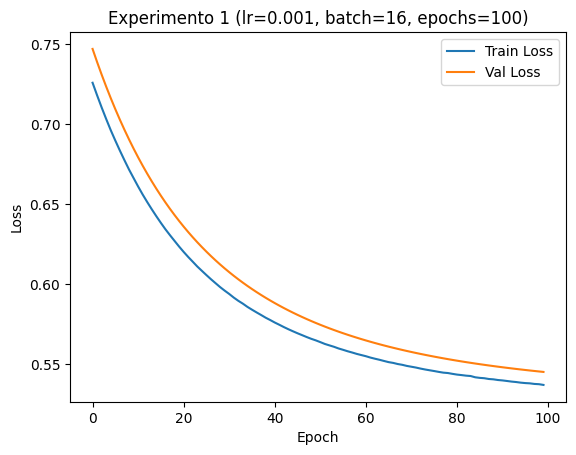

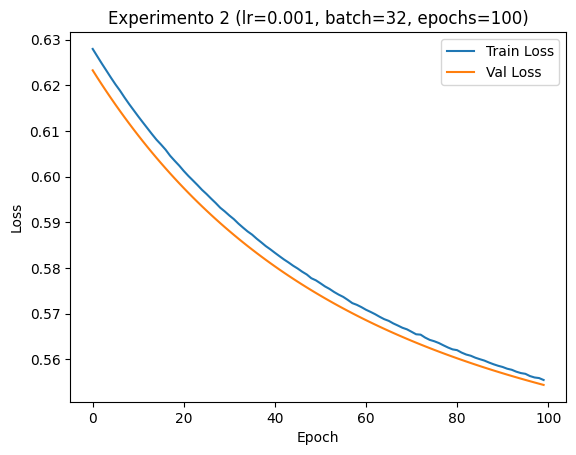

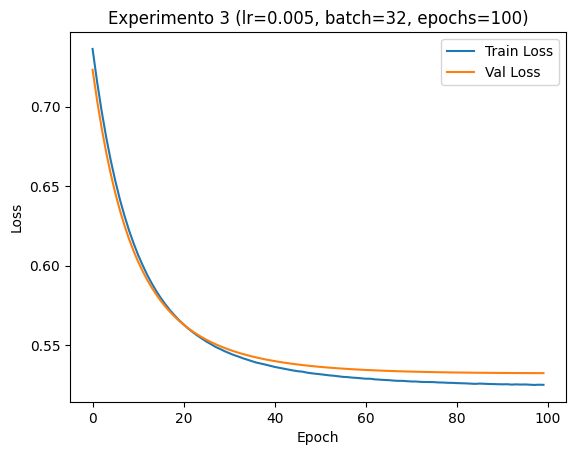

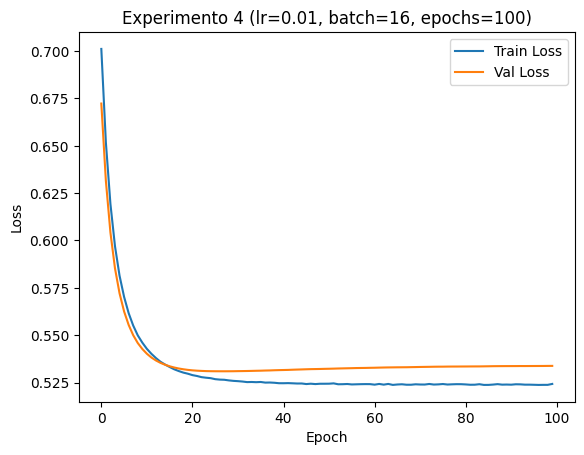

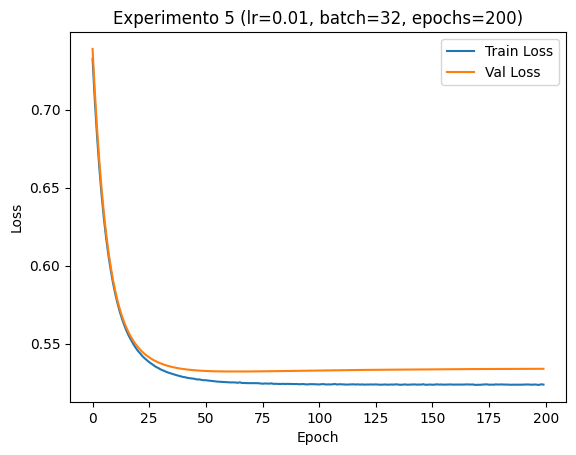

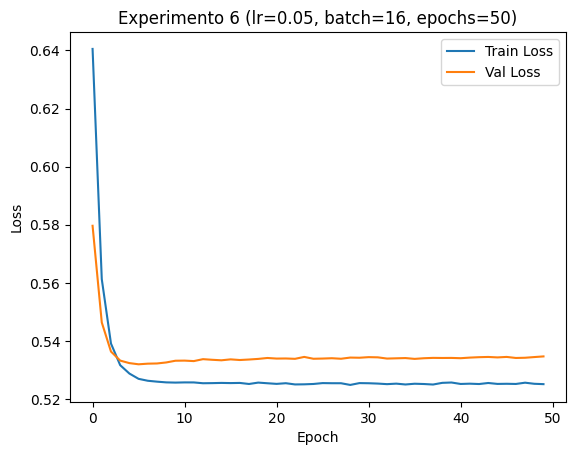

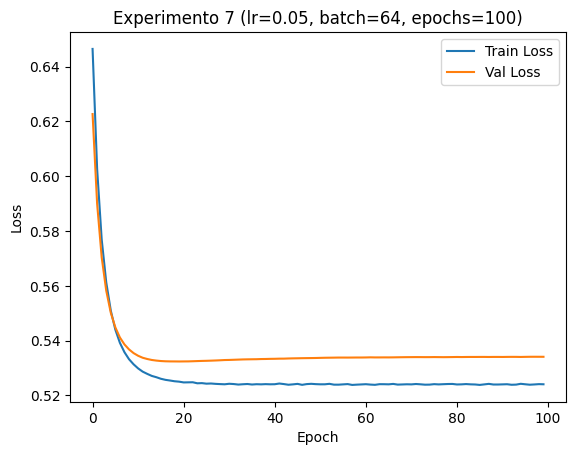

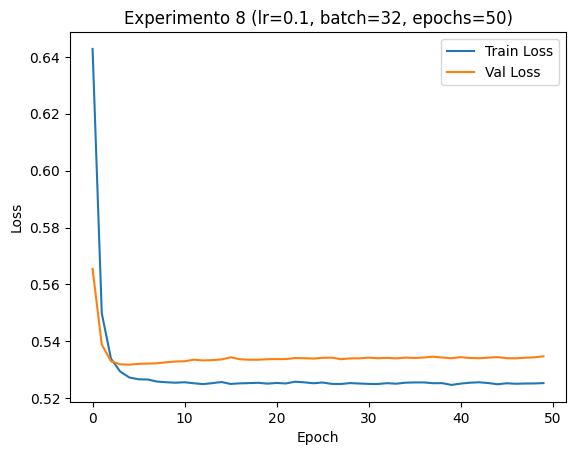

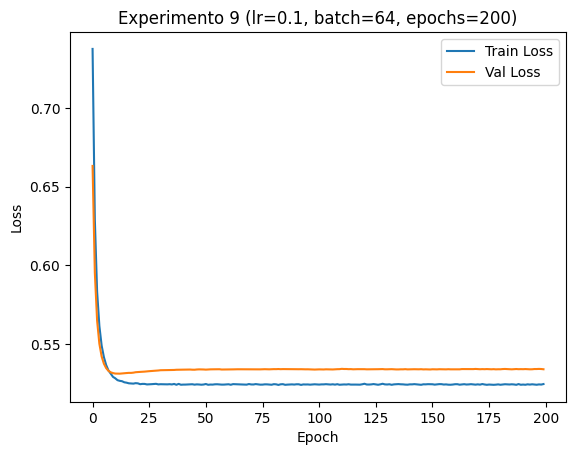

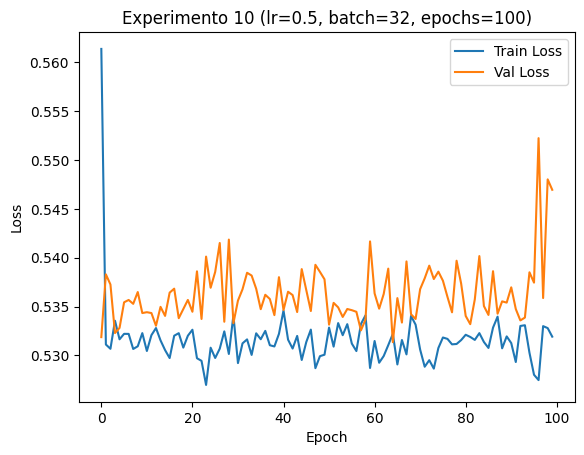

   Exp     LR  Batch  Epochs  Accuracy  Precision    Recall        F1  \
0    1  0.001     16     100  0.715625   0.727273  0.748538  0.737752   
1    2  0.001     32     100  0.721875   0.762821  0.695906  0.727829   
2    3  0.005     32     100  0.737500   0.743017  0.777778  0.760000   
3    4  0.010     16     100  0.740625   0.741758  0.789474  0.764873   
4    5  0.010     32     200  0.740625   0.741758  0.789474  0.764873   
5    6  0.050     16      50  0.740625   0.741758  0.789474  0.764873   
6    7  0.050     64     100  0.740625   0.741758  0.789474  0.764873   
7    8  0.100     32      50  0.740625   0.741758  0.789474  0.764873   
8    9  0.100     64     200  0.740625   0.741758  0.789474  0.764873   
9   10  0.500     32     100  0.721875   0.713542  0.801170  0.754821   

        AUC  
0  0.802347  
1  0.797677  
2  0.808273  
3  0.807528  
4  0.807489  
5  0.806900  
6  0.807371  
7  0.806821  
8  0.807253  
9  0.797755  


In [24]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

results = []

for i, params in enumerate(experiments, 1):
    model = models[i]

    with torch.no_grad():
        val_probs = model(X_val_t).numpy()
        val_preds = (val_probs >= 0.5).astype(int)
        y_true = y_val_t.numpy().astype(int)

    metrics = {
        "Exp": i,
        "LR": params["lr"],
        "Batch": params["batch"],
        "Epochs": params["epochs"],
        "Accuracy": accuracy_score(y_true, val_preds),
        "Precision": precision_score(y_true, val_preds),
        "Recall": recall_score(y_true, val_preds),
        "F1": f1_score(y_true, val_preds),
        "AUC": roc_auc_score(y_true, val_probs)
    }
    results.append(metrics)

    # Graficar curvas Train vs Val Loss
    plt.figure()
    plt.plot(histories[i]["train_loss"], label="Train Loss")
    plt.plot(histories[i]["val_loss"], label="Val Loss")
    plt.title(f"Experimento {i} (lr={params['lr']}, batch={params['batch']}, epochs={params['epochs']})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Tabla comparativa
df_results = pd.DataFrame(results)
print(df_results)
